In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load the dataset
df = pd.read_csv('/content/cleaned_data_DX.csv')

In [ ]:
print(df)

     Gender  Age Handedness  DX  ADHD Measure  ADHD Index  Inattentive  \
0         1   17          1   0             2        52.0         52.0   
1         1   16          1   0             2        30.0         29.0   
2         0   15          1   0             2        30.0         29.0   
3         0   15          1   0             2        30.0         29.0   
4         1   17          0   0             2        52.0         52.0   
..      ...  ...        ...  ..           ...         ...          ...   
545       1   12          1   0             2        23.0         22.0   
546       1   14          1   0             2        30.0         29.0   
547       0   13          0   0             2        23.0         22.0   
548       1   16          1   0             2        30.0         29.0   
549       0   10          1   0             2        37.0         41.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0               50.0           2      

In [ ]:
import pandas as pd
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]))
# Convert 'Handedness' column to numeric type (float)
df_filled['Handedness'] = pd.to_numeric(df_filled['Handedness'], errors='coerce')

# Replace all decimal values of the 'Handedness' column with round figures of either 0 or 1
df_filled['Handedness'] = df_filled['Handedness'].apply(lambda x: round(x) if not pd.isnull(x) else x)

# Now, you can proceed with the rest of your code


In [ ]:
import numpy as np

# Replace all non-integer and non-NaN values of the 'Handedness' column with either 0 or 1
df_filled['Handedness'] = df_filled['Handedness'].apply(lambda x: round(x) if isinstance(x, float) and not np.isnan(x) else x)

# Replace -999 with 0 or 1 (you can choose)
df_filled['Handedness'].replace(-999, 0, inplace=True)  # Replace -999 with 0

# Print unique values in the 'Handedness' column after replacement
print("\nUnique values in 'Handedness' column after replacement:")
print(df_filled['Handedness'].unique())

# Print the 'Handedness' column without truncation
with pd.option_context('display.max_rows', None):
    print(df_filled['Handedness'])






Unique values in 'Handedness' column after replacement:
[ 1.  0.  2. nan]
0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0
40     1.0
41     0.0
42     1.0
43     1.0
44     1.0
45     1.0
46     0.0
47     1.0
48     1.0
49     1.0
50     1.0
51     0.0
52     1.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     0.0
59     1.0
60     1.0
61     1.0
62     1.0
63     1.0
64     1.0
65     1.0
66     1.0
67     1.0
68     1.0
69     1.0
70     1.0
71     0.0
72     1.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     0.0
79     1.0
80     1.0
81     1.0
82     1.0
83     1.0
8

In [ ]:
# Find rows where 'Handedness' column has a value of 2
rows_with_2 = df_filled[df_filled['Handedness'] == 2]

# Print the rows
print(rows_with_2)


     Gender  Age  Handedness  DX  ADHD Measure  ADHD Index  Inattentive  \
102       0    9         2.0   0             2        49.0         47.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
102             54.0           1        114             102     116.0   

     Med Status  
102           2  


In [ ]:
# Calculate the mode of 'Med Status' column
mode_med_status = df['Med Status'].mode()[0]

# Replace -999 values with the mode
df['Med Status'] = df['Med Status'].replace(-999, mode_med_status)

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the entire 'Med Status' column
print(df['Med Status'])

# Reset display option to default
pd.reset_option('display.max_rows')
print(df['Med Status'].unique())


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    1
110    1
1

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'df_filled' is your DataFrame after handling missing values
df_encoded = pd.get_dummies(df_filled, columns=['Gender', 'Handedness'])

# Separate features and target variable
X = df_encoded.drop(columns=['DX'])  # Features
y = df_encoded['DX']  # Target variable


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (440, 15) (440,)
Testing set shape: (110, 15) (110,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Calculate the mean accuracy across all folds
training_accuracy = cv_scores.mean()

# Make predictions on the training data
y_train_pred = clf.predict(X_train)

print("Training Accuracy:", training_accuracy)



Training Accuracy: 0.8545454545454545


In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.81      0.81      0.81        26
           3       0.45      0.45      0.45        11

    accuracy                           0.87       110
   macro avg       0.74      0.74      0.74       110
weighted avg       0.87      0.87      0.87       110



Input 1: Right prediction
* R-> DX:0
* P-> DX:0

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [1],
    'Gender_0': [0],
    'Age': [17],
    'ADHD Measure': [2],
    'ADHD Index': [52],
    'Inattentive': [52],
    'Hyper/Impulsive': [50],
    'IQ Measure': [2],
    'Verbal IQ': [133],
    'Performance IQ': [104],
    'Full4 IQ': [120],
    'Med Status': [1],
    'Handedness_0.0': [0],
    'Handedness_1.0': [1],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted Dx measure:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)


Predicted Dx measure: [0]
Predicted ADHD Severity Level: No adhd


Input 2: Right prediction
* R-> DX:1
* P-> DX:1

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [1],
    'Gender_0': [0],
    'Age': [12],
    'ADHD Measure': [2],
    'ADHD Index': [71],
    'Inattentive': [62],
    'Hyper/Impulsive': [70],
    'IQ Measure': [1],
    'Verbal IQ': [93],
    'Performance IQ': [108],
    'Full4 IQ': [99],
    'Med Status': [1],
    'Handedness_0.0': [0],
    'Handedness_1.0': [1],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)


Predicted DX status: [1]
Predicted ADHD Severity Level: Mild


Input 3: Wrong prediction

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [1],
    'Gender_0': [0],
    'Age': [12],
    'ADHD Measure': [2],
    'ADHD Index': [64],
    'Inattentive': [74],
    'Hyper/Impulsive': [58],
    'IQ Measure': [1],
    'Verbal IQ': [93],
    'Performance IQ': [98],
    'Full4 IQ': [88],
    'Med Status': [1],
    'Handedness_0.0': [0],
    'Handedness_1.0': [1],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted ADHD Status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)


Predicted ADHD Status: [1]
Predicted ADHD Severity Level: Mild


Input 3: Right predication
* R -> DX: 2
* P -> DX:2

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [1],
    'Gender_0': [0],
    'Age': [10],
    'ADHD Measure': [2],
    'ADHD Index': [64],
    'Inattentive': [61],
    'Hyper/Impulsive': [68],
    'IQ Measure': [1],
    'Verbal IQ': [110],
    'Performance IQ': [123],
    'Full4 IQ': [113],
    'Med Status': [1],
    'Handedness_0.0': [0],
    'Handedness_1.0': [1],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)


Predicted DX status: [2]
Predicted ADHD Severity Level: Moderate


Input 5: Right Prediction
* R -> DX: 3
* P -> DX: 3

Predicted DX status: [3]
Predicted ADHD Severity Level: Severe


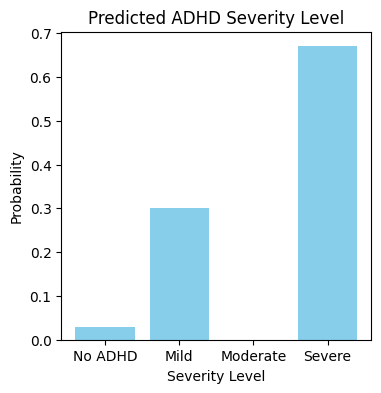

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [1],
    'Gender_0': [0],
    'Age': [16],
    'ADHD Measure': [2],
    'ADHD Index': [70],
    'Inattentive': [77],
    'Hyper/Impulsive': [62],
    'IQ Measure': [2],
    'Verbal IQ': [132],
    'Performance IQ': [107],
    'Full4 IQ': [122],
    'Med Status': [1],
    'Handedness_0.0': [0],
    'Handedness_1.0': [1],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)

import matplotlib.pyplot as plt

# Define the severity levels and their corresponding probabilities
severity_levels = ['No ADHD', 'Mild', 'Moderate', 'Severe']
probabilities = predicted_probabilities[0]  # Assuming you have only one prediction

# Create a bar plot
plt.figure(figsize=(4,4))
plt.bar(severity_levels, probabilities, color='skyblue')

# Add labels and title
plt.xlabel('Severity Level')
plt.ylabel('Probability')
plt.title('Predicted ADHD Severity Level')

# Show plot
plt.show()


Input 6: Right Prediction

* R-> DX: 0
* P -> DX:0

Predicted DX status: [0]
Predicted ADHD Severity Level: No adhd


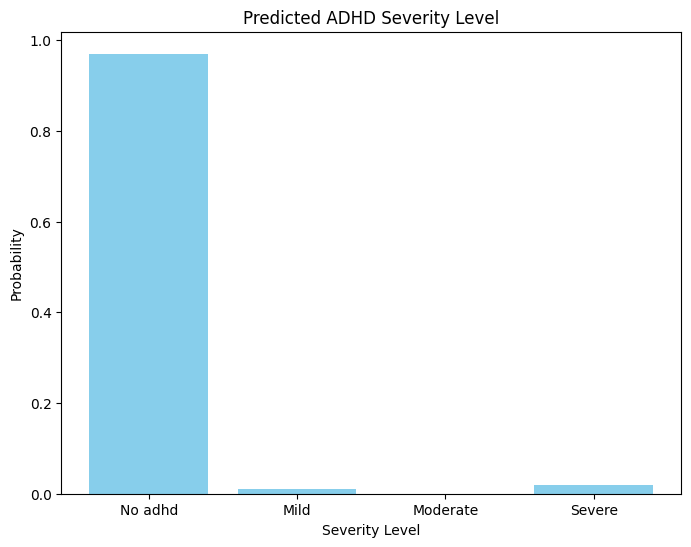

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [0],
    'Gender_0': [1],
    'Age': [9],
    'ADHD Measure': [2],
    'ADHD Index': [49],
    'Inattentive': [47],
    'Hyper/Impulsive': [54],
    'IQ Measure': [1],
    'Verbal IQ': [114],
    'Performance IQ': [102],
    'Full4 IQ': [116],
    'Med Status': [2],
    'Handedness_0.0': [0],
    'Handedness_1.0': [0],
    'Handedness_2.0': [1],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)

import matplotlib.pyplot as plt

# Define the severity levels and their corresponding probabiliti
probabilities = predicted_probabilities[0]  # Assuming you have only one prediction

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(severity_levels, probabilities, color='skyblue')

# Add labels and title
plt.xlabel('Severity Level')
plt.ylabel('Probability')
plt.title('Predicted ADHD Severity Level')

# Show plot
plt.show()



Input 7: Right Predicition
* R -> DX: 0
* P ->DX : 0

Predicted DX status: [0]
Predicted ADHD Severity Level: No adhd


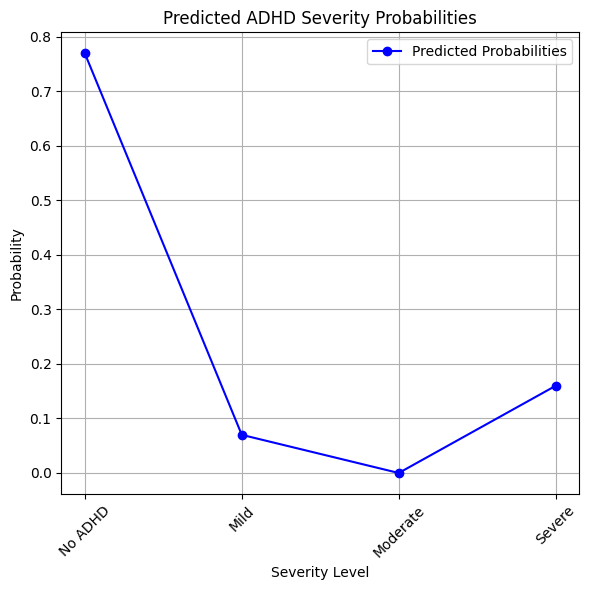

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Gender_1': [0],
    'Gender_0': [1],
    'Age': [13],
    'ADHD Measure': [2],
    'ADHD Index': [23],
    'Inattentive': [22],
    'Hyper/Impulsive': [22],
    'IQ Measure': [2],
    'Verbal IQ': [113],
    'Performance IQ': [105],
    'Full4 IQ': [1],
    'Med Status': [2],
    'Handedness_0.0': [1],
    'Handedness_1.0': [0],
    'Handedness_2.0': [0],
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Reorder columns to match the order during training
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender_0', 'Gender_1', 'Handedness_0.0', 'Handedness_1.0', 'Handedness_2.0']]

# Make predictions on the input data
predictions = clf.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = clf.predict_proba(input_df)

# Assuming the predicted probabilities are returned in the order of severity levels
# You need to define your severity levels based on the classifier output
severity_levels = ['No adhd', 'Mild', 'Moderate','Severe']

# Determine the severity level based on the predicted probabilities
predicted_severity_index = np.argmax(predicted_probabilities)
predicted_severity_level = severity_levels[predicted_severity_index]

# Print the predicted severity level
print("Predicted ADHD Severity Level:", predicted_severity_level)

import matplotlib.pyplot as plt

# Define severity levels
severity_levels = ['No ADHD', 'Mild', 'Moderate', 'Severe']

# Plot predicted probabilities
plt.figure(figsize=(6, 6))
plt.plot(severity_levels, predicted_probabilities[0], marker='o', linestyle='-', color='b', label='Predicted Probabilities')
plt.title('Predicted ADHD Severity Probabilities')
plt.xlabel('Severity Level')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




